# Homework 1 Clustering and Regression

## Instructions
Answer the questions and upload your answers to courseville. Answers can be
in Thai or English. Answers can be either typed or handwritten and scanned.
the assignment is divided into several small tasks. Each task is weighted equally
(marked with **T**). For this assignment, each task is awarded 1 points for a total
of 9 points. There are also optional tasks (marked with **OT**) counts for 0.5
points each.

## Hello Clustering
Recall from lecture that K-means has two main steps: the points assignment
step, and the mean update step. After the initialization of the centroids, we
assign each data point to a centroid. Then, each centroids are updated by
re-estimating the means.
Concretely, if we are given N data points, $x_1, x_2, ..., x_N$ , and we would like
to form K clusters. We do the following;
1. **Initialization***: Pick K random data points as K centroid locations $c_1, c_2, ..., c_K$.
2. **Assign**: For each data point k, find the closest centroid. Assign that
data point to the centroid. The distance used is typically Euclidean distance.
3. **Update**: For each centroid, calculate the mean from the data points
assigned to it.
4. **Repeat**: repeat step 2 and 3 until the centroids stop changing (convergence).
Given the following data points in x-y coordinates (2 dimensional)


| x | y |
|:--:|:--:|
| 1 | 2 |
| 3 | 3 |
| 2 | 2 |
| 8 | 8 |
| 6 | 6 |
| 7 | 7 |
| -3 | -3 |
| -2 | -4 |
| -7 | -7 |

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

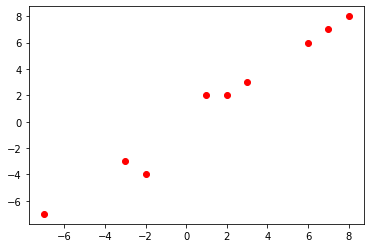

In [2]:
x = np.array([1,3,2,8,6,7,-3,-2,-7])
y = np.array([2,3,2,8,6,7,-3,-4,-7])
plt.scatter(x, y, color = 'red')
plt.show()

&emsp; **T1.** &emsp; If the starting points are (3,3), (2,2), and (-3,3). Describe each assign and update step. What are the points assigned? What are the updated means? You may do this calculation by hand or write a program to do it. <br>
&emsp; **T2.** &emsp; If the starting points are (-3,-3), (2,2), and (-7,-7), what happens? <br>
&emsp; **T3.** &emsp; Between the two starting set of points in the previous two questions, which vone do you think is better? How would you measure the ‘goodness’ quality of a set of starting points? <br>
&emsp; In general, it is important to try different sets of starting points when
doing k-means. <br>
&emsp; **OT1.** &emsp; What would be the best K for this question? Describe your reasoning.

In [3]:
class KMeans:
    def __init__(self, data_points):
        self.data_points = data_points
        self.k = None
        self.centroids = None
        self.prev_centroids = None
        self.clusters = [None]*len(data_points)
        self.prev_clusters = [None]*len(data_points)
        
    def summary(self):
        print(f"data_points   : {self.data_points}")
        print(f"k             : {self.k}")
        print(f"centroids     : {self.centroids}")
        print(f"prev_centroids: {self.prev_centroids}")
        print(f"clusters      : {self.clusters}")
        print(f"prev_clusters : {self.prev_clusters}")
        
    def distance(self, p1, p2):
        return ((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)**0.5
    
    def initialization(self, k=2, centroids=[(-100, -100), (100, 100)]):
        if k != len(centroids):
            print("Error: length of points not equal K.")
        else:
            self.prev_centroids = self.centroids
            self.centroids = centroids
            self.k = k
        
    def assign(self):
        next_clusters = []
        for point in self.data_points:
            distances = []
            for centroid in self.centroids:
                distances.append(self.distance(point, centroid))
            next_clusters.append(np.argmin(distances))
        self.prev_clusters = self.clusters
        self.clusters = next_clusters
        return next_clusters
                    
    def update(self):
        centroid_points = []
        for clusterID in range(self.k):
            points = []
            for idx in range(len(self.data_points)):
                if self.clusters[idx] == clusterID:
                    points.append(self.data_points[idx])
            x_data = [point[0] for point in points]
            y_data = [point[1] for point in points]
            x_mean = np.mean(x_data)
            y_mean = np.mean(y_data)
            centroid_points.append((x_mean, y_mean))
        self.prev_centroids = self.centroids
        self.centroids = centroid_points
        
    def step(self):
        self.assign()
        self.update()
    
    def same_centroid(self):
        for i in range(len(self.centroids)):
            c_i = self.centroids[i]
            pc_i = self.prev_centroids[i]
            if self.distance(c_i, pc_i) > 1e-2:
                return False
        return True
        
    def fit(self, debug=False):
        while(True):
            self.assign()
            self.update()
            if debug:
                print("------------------------------------")
                print(f"centroids     : {self.centroids}")
                print(f"prev_centroids: {self.prev_centroids}")
            if self.same_centroid():
                break
        
    def plot(self):
        for clusterID in range(self.k):
            plt_x = []
            plt_y = []
            for i in range(len(self.data_points)):
                if self.clusters[i] == clusterID:
                    plt_x.append(self.data_points[i][0])
                    plt_y.append(self.data_points[i][1])
            plt.scatter(plt_x, plt_y)
        plt.show()
        
    def WCSS(self):
        WCSS = 0
        for idx, clusterID in enumerate(self.clusters):
            point = self.data_points[idx]
            centroid_point = self.centroids[clusterID]
            WCSS += self.distance(point, centroid_point)**2
        return WCSS
    

&emsp; **T1.** &emsp; If the starting points are (3,3), (2,2), and (-3,3). Describe each assign and update step. What are the points assigned? What are the updated means? You may do this calculation by hand or write a program to do it. <br>

First, set data_points for do K-Means clustering (k = 3) with start centroid (3,3), (2,2), and (-3,3)

In [4]:
data_points = [(1,2), (3,3), (2,2), (8,8), (6,6), (7,7), (-3,-3), (-2,-4), (-7,-7)]
startPoints_1 = [(3,3), (2,2), (-3,-3)]
KM1 = KMeans(data_points)
KM1.initialization(k=3, centroids=startPoints_1)
KM1.summary()

data_points   : [(1, 2), (3, 3), (2, 2), (8, 8), (6, 6), (7, 7), (-3, -3), (-2, -4), (-7, -7)]
k             : 3
centroids     : [(3, 3), (2, 2), (-3, -3)]
prev_centroids: None
clusters      : [None, None, None, None, None, None, None, None, None]
prev_clusters : [None, None, None, None, None, None, None, None, None]


Second, assign method. Set each data_points in centroids (the algorithm can check in class method).

In [5]:
KM1.assign()
KM1.summary()

data_points   : [(1, 2), (3, 3), (2, 2), (8, 8), (6, 6), (7, 7), (-3, -3), (-2, -4), (-7, -7)]
k             : 3
centroids     : [(3, 3), (2, 2), (-3, -3)]
prev_centroids: None
clusters      : [1, 0, 1, 0, 0, 0, 2, 2, 2]
prev_clusters : [None, None, None, None, None, None, None, None, None]


Third, update method. update new centroid points.

In [6]:
KM1.update()
KM1.summary()

data_points   : [(1, 2), (3, 3), (2, 2), (8, 8), (6, 6), (7, 7), (-3, -3), (-2, -4), (-7, -7)]
k             : 3
centroids     : [(6.0, 6.0), (1.5, 2.0), (-4.0, -4.666666666666667)]
prev_centroids: [(3, 3), (2, 2), (-3, -3)]
clusters      : [1, 0, 1, 0, 0, 0, 2, 2, 2]
prev_clusters : [None, None, None, None, None, None, None, None, None]


Then, do assign and update until previous centroids and current centroids are same.

In [7]:
KM1.fit()
KM1.summary()

data_points   : [(1, 2), (3, 3), (2, 2), (8, 8), (6, 6), (7, 7), (-3, -3), (-2, -4), (-7, -7)]
k             : 3
centroids     : [(7.0, 7.0), (2.0, 2.3333333333333335), (-4.0, -4.666666666666667)]
prev_centroids: [(7.0, 7.0), (2.0, 2.3333333333333335), (-4.0, -4.666666666666667)]
clusters      : [1, 1, 1, 0, 0, 0, 2, 2, 2]
prev_clusters : [1, 1, 1, 0, 0, 0, 2, 2, 2]


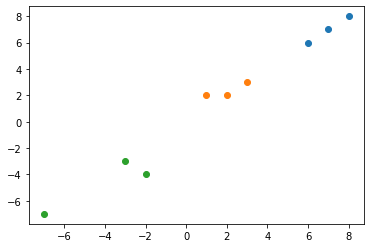

In [8]:
KM1.plot()

&emsp; **T2.** &emsp; If the starting points are (-3,-3), (2,2), and (-7,-7), what happens? <br>

In [9]:
data_points = [(1,2), (3,3), (2,2) , (8,8), (6,6), (7,7), (-3,-3), (-2,-4), (-7,-7)]
KM2 = KMeans(data_points)
startPoints_2 = [(-3,-3), (2,2), (-7,-7)]
KM2.initialization(k=3, centroids=startPoints_2)
KM2.summary()

data_points   : [(1, 2), (3, 3), (2, 2), (8, 8), (6, 6), (7, 7), (-3, -3), (-2, -4), (-7, -7)]
k             : 3
centroids     : [(-3, -3), (2, 2), (-7, -7)]
prev_centroids: None
clusters      : [None, None, None, None, None, None, None, None, None]
prev_clusters : [None, None, None, None, None, None, None, None, None]


In [10]:
KM2.fit(debug=True)

------------------------------------
centroids     : [(-2.5, -3.5), (4.5, 4.666666666666667), (-7.0, -7.0)]
prev_centroids: [(-3, -3), (2, 2), (-7, -7)]
------------------------------------
centroids     : [(-2.5, -3.5), (4.5, 4.666666666666667), (-7.0, -7.0)]
prev_centroids: [(-2.5, -3.5), (4.5, 4.666666666666667), (-7.0, -7.0)]


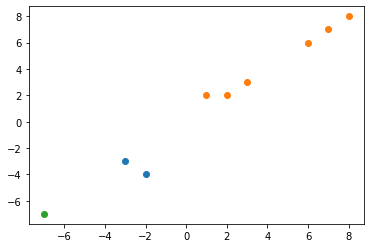

In [11]:
KM2.plot()

&emsp; **T3.** &emsp; Between the two starting set of points in the previous two questions, which one do you think is better? How would you measure the ‘goodness’ quality of a set of starting points? <br>
&emsp; In general, it is important to try different sets of starting points when
doing k-means. <br>

The starting points from question **T1.** is better than **T2.**. We can measure the "goodness" quality by eye rolling. <br>
&emsp; From **T1.**, each cluster contains 3, 3 and 3 respectively. <br>
&emsp; From **T2.**, each cluster contains 2, 6 and 1 respectively. <br>
So, **T1.** is better than **T2.**

&emsp; **OT1.** &emsp; What would be the best K for this question? Describe your reasoning.

To find the best K value, we can use Elbow Method with Within Cluster Sum of Squares (WCSS) value and find proper K value that have minimum WCSS value.

In [12]:
WCSSs = []
data_points = [(1,2), (3,3), (2,2) , (8,8), (6,6), (7,7), (-3,-3), (-2,-4), (-7,-7)]
for time in range(10):
    WCSS_time = []
    startPoints = data_points.copy()
    for k in range(1,9):
        KM = KMeans(data_points)
        random.shuffle(startPoints)
        KM.initialization(k=k, centroids=startPoints[:k])
        KM.fit()
        WCSS_time.append(KM.WCSS())
    WCSSs.append(WCSS_time)

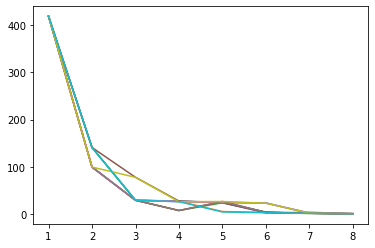

In [13]:
for attemp in range(10):
    plt.plot(range(1, 9), WCSSs[attemp])
plt.show()

From the Elbow Method's graph, we choose K = 3 is the best K.

## My heart will go on
&emsp; In this part of the exercise we will work on the Titanic dataset provided by Kaggle. The Titanic dataset contains information of the passengers boarding the Titanic on its final voyage. We will work on predicting whether a given passenger will survive the trip. <br>
&emsp; Let’s launch Jupyter and start coding! <br>
&emsp; We start by importing the data using Pandas <br>

In [14]:
train_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/train.csv"
train = pd.read_csv(train_url) #training set

test_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/test.csv"
test = pd.read_csv(test_url) #test set

In [15]:
"""
train = pd.read_csv("train.csv") #training set
test = pd.read_csv("test.csv") #test set
"""

'\ntrain = pd.read_csv("train.csv") #training set\ntest = pd.read_csv("test.csv") #test set\n'

&emsp; Both train and test are dataframes. Use the function train.head() and
train.tail() to explore the data. What do you see?

In [16]:
train.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


&emsp; Use the function describe() to get a better understanding of the data.
You can read the meaning of the data fields at https://www.kaggle.com/c/titanic/data


In [18]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


&emsp; Looking at the data, you will notice a lot of missing values. For example,
some age is NaN. This is normal for real world data to have some missing values.
There are several ways to handle missing values. The simplest is to throw away
any rows that have missing values. However, this usually reduce the amount
of training data you have. Another method is to guess what the missing value
should be. The simplest guess is to use the Median or Mode of the data. For
this exercise we will proceed with this.

&emsp; **T4.** What is the median age of the training set? You can easily modify the age in the dataframe by <br>
> train["Age"] = train["Age"].fillna(train["Age"].median())

In [19]:
train["Age"].median()

28.0

In [20]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [21]:
train["Age"] = train["Age"].fillna(train["Age"].median())

In [22]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Note that you need to modify the code above a bit to fill with mode() because
mode() returns a series rather than a single value.

In [23]:
train["Age"].mode().iloc[0]

28.0

&emsp; **T5.** Some fields like ‘Embarked’ are categorical. They need to be converted to numbers first. We will represent S with 0, C with 1, and Q with 2. What is the mode of Embarked? Fill the missing values with the mode. You can set the value of Embarked easily with the following command.
> train.loc[train["Embarked"] == "S", "Embarked"] = 0

In [24]:
train.loc[train["Embarked"] == "S", "Embarked"] = 0
train.loc[train["Embarked"] == "C", "Embarked"] = 1
train.loc[train["Embarked"] == "Q", "Embarked"] = 2

In [25]:
train["Embarked"] = train["Embarked"].fillna(train["Embarked"].mode().iloc[0])

&emsp; Do the same for Sex.

In [26]:
train.loc[train["Sex"] == "male", "Sex"] = 0
train.loc[train["Sex"] == "female", "Sex"] = 1

In [27]:
train["Sex"] = train["Sex"].fillna(train["Sex"].mode().iloc[0])

In [28]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [29]:
test["Age"] = test["Age"].fillna(test["Age"].median())
test.loc[test["Embarked"] == "S", "Embarked"] = 0
test.loc[test["Embarked"] == "C", "Embarked"] = 1
test.loc[test["Embarked"] == "Q", "Embarked"] = 0
test.loc[test["Sex"] == "male", "Sex"] = 0
test.loc[test["Sex"] == "female", "Sex"] = 0
test["Sex"] = test["Sex"].fillna(test["Sex"].mode().iloc[0])
test["Embarked"] = test["Embarked"].fillna(test["Embarked"].mode().iloc[0])

In [30]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

&emsp; **T6.** Write a logistic regression classifier using gradient descent as learned in
class. Use PClass, Sex, Age, and Embarked as input features. You can extract
the features from Pandas to Numpy by
> data = np.array(train[["Pclass","Sex","Age","Embarked"]].values)

In [31]:
data = np.array(train[["Pclass","Sex","Age","Embarked"]].values)

&emsp; Check the datatype of each values in data, does it make sense? You can
force the data to be of any datatype by using the command
> data = np.array(train[["Pclass","Sex","Age","Embarked"]].values, dtype = float)

In [32]:
data = np.array(train[["Pclass","Sex","Age","Embarked"]].values, dtype = float)

&emsp; When you evaluate the trained model on the test set, you will need to make a final decision. Since logistic regression outputs a score between 0 and 1, you will need to decide whether a score of 0.3 (or any other number) means the passenger survive or not. For now, we will say if the score is greater than or equal to 0.5, the passenger survives. If the score is lower than 0.5 the passenger will be dead. This process is often called ‘Thresholding.’ We will talk more
about this process later in class. <br>
&emsp; To evaluate your results, we will use Kaggle. Kaggle is a website that hosts many machine learning competitions. Many companies put up their data as a problem for anyone to participate. If you are looking for a task for your course project, Kaggle might be a good place to start. You will need to make sure that your output is in line with the submission requirements of Kaggle: a csv file with exactly 418 entries and two columns: PassengerId and Survived. Then, use the code provided to make a new data frame using DataFrame(), and create a csv file using to csv() method from Pandas. <br>
&emsp; To submit your prediction, you must first sign-up for an account on Kaggle.com. Click participate to the competition at https://www.kaggle.com/c/titanic/ then submit your csv file for the score. <br>
&emsp; The output file should have two columns: the passengerId and a 0,1 decision (0 for dead, 1 for survive). As shown below: <br><br>
**PassengerId,Survived <br>
892,0 <br>
893,1 <br>
894,0**

In [33]:
train_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/train.csv"
train = pd.read_csv(train_url) #training set

test_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/test.csv"
test = pd.read_csv(test_url) #test set

In [34]:
"""
train = pd.read_csv("train.csv") #training set
test = pd.read_csv("test.csv") #test set
"""

'\ntrain = pd.read_csv("train.csv") #training set\ntest = pd.read_csv("test.csv") #test set\n'

In [35]:
train = train.drop(["Name", "SibSp", "Parch", "Ticket", "Fare", "Cabin"], axis = 1)
test = test.drop(["Name", "SibSp", "Parch", "Ticket", "Fare", "Cabin"], axis = 1)

train

,PassengerId,Survived,Pclass,Sex,Age,Embarked
0,1,0,3,male,22.0,S
1,2,1,1,female,38.0,C
2,3,1,3,female,26.0,S
3,4,1,1,female,35.0,S
4,5,0,3,male,35.0,S
...,...,...,...,...,...,...
886,887,0,2,male,27.0,S
887,888,1,1,female,19.0,S
888,889,0,3,female,NaN,S
889,890,1,1,male,26.0,C


In [36]:
#clear outliers
q75, q25 = np.percentile(train["Age"].dropna(), [75 ,25])
iqr = q75 - q25

min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)
train.loc[train["Age"] < min, "Age"] = min
train.loc[train["Age"] > max, "Age"] = max

In [37]:
#fill nan
train["Age"] = train["Age"].fillna(train["Age"].median())
train["Sex"] = train["Sex"].fillna(train["Sex"].mode().iloc[0])
train["Embarked"] = train["Embarked"].fillna(train["Embarked"].mode().iloc[0])
#change categorical to number
train.loc[train["Embarked"] == "S", "Embarked"] = 0
train.loc[train["Embarked"] == "C", "Embarked"] = 1
train.loc[train["Embarked"] == "Q", "Embarked"] = 2
train.loc[train["Sex"] == "male", "Sex"] = 0
train.loc[train["Sex"] == "female", "Sex"] = 1
#normalize
train["Pclass_norm"] =  train["Pclass"] / train["Pclass"].max()
train["Age_norm"] = train["Age"] / train["Age"].max()
train["Embarked_norm"] = train["Embarked"] / train["Embarked"].max()

In [38]:
for col in train.columns:
    print(col, train[col].isnull().sum())

PassengerId 0
Survived 0
Pclass 0
Sex 0
Age 0
Embarked 0
Pclass_norm 0
Age_norm 0
Embarked_norm 0


In [39]:
#fill nan
test["Age"] = test["Age"].fillna(test["Age"].median())
test["Sex"] = test["Sex"].fillna(test["Sex"].mode().iloc[0])
test["Embarked"] = test["Embarked"].fillna(test["Embarked"].mode().iloc[0])
#change categorical to number
test.loc[test["Embarked"] == "S", "Embarked"] = 0
test.loc[test["Embarked"] == "C", "Embarked"] = 1
test.loc[test["Embarked"] == "Q", "Embarked"] = 2
test.loc[test["Sex"] == "male", "Sex"] = 0
test.loc[test["Sex"] == "female", "Sex"] = 1
#normalize
test["Pclass_norm"] =  test["Pclass"] / test["Pclass"].max()
test["Age_norm"] = test["Age"] / test["Age"].max()
test["Embarked_norm"] = test["Embarked"] / test["Embarked"].max()

In [40]:
train

,PassengerId,Survived,Pclass,Sex,Age,Embarked,Pclass_norm,Age_norm,Embarked_norm
0,1,0,3,0,22.0,0,1.000000,0.339441,0.0
1,2,1,1,1,38.0,1,0.333333,0.586307,0.5
2,3,1,3,1,26.0,0,1.000000,0.401157,0.0
3,4,1,1,1,35.0,0,0.333333,0.540019,0.0
4,5,0,3,0,35.0,0,1.000000,0.540019,0.0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0.666667,0.416586,0.0
887,888,1,1,1,19.0,0,0.333333,0.293153,0.0
888,889,0,3,1,28.0,0,1.000000,0.432015,0.0
889,890,1,1,0,26.0,1,0.333333,0.401157,0.5


In [41]:
test

,PassengerId,Pclass,Sex,Age,Embarked,Pclass_norm,Age_norm,Embarked_norm
0,892,3,0,34.5,2,1.000000,0.453947,1.0
1,893,3,1,47.0,0,1.000000,0.618421,0.0
2,894,2,0,62.0,2,0.666667,0.815789,1.0
3,895,3,0,27.0,0,1.000000,0.355263,0.0
4,896,3,1,22.0,0,1.000000,0.289474,0.0
...,...,...,...,...,...,...,...,...
413,1305,3,0,27.0,0,1.000000,0.355263,0.0
414,1306,1,1,39.0,1,0.333333,0.513158,0.5
415,1307,3,0,38.5,0,1.000000,0.506579,0.0
416,1308,3,0,27.0,0,1.000000,0.355263,0.0


In [42]:
class Logistic_Regression:
    def __init__(self):
        self.coef = None
        self.learning_rate = None
        self.epoch = None
        self.history = None
        
    def add_x0(self, x):
        new_x = np.ones((x.shape[0], x.shape[1]+1))
        new_x[:,1:] = x
        return new_x
    
    def initialize(self, x_shape, y_shape, learning_rate):
        print()
        self.coef = np.ones(x_shape[1]).reshape(x_shape[1])
        self.learning_rate = learning_rate
        self.history = []
    
    def h_x(self, data):
        # coef = [t0, t1, t2, t3, ... , tn]
        # data = [ 1, d1, d2, d3, ... , dn]
        # want h(x) = 1/( 1 + e^(-coef * data)  )
        return 1/(1 + np.exp((-1)*np.dot(self.coef, data)))
    
    def predict(self, data_X, add_x0 = True, getIntVal = False):
        if add_x0:
            data_X = self.add_x0(np.array(data_X))
        preds = []
        for data in data_X:
            preds.append(self.h_x(data))
        preds = np.array(preds)
        if getIntVal:
            preds = preds > 0.5
            preds = preds.astype(int)
        return preds
    
    def train(self, x, y, learning_rate):
        # predict y' using x and current coefs
        # for each coef, calculate curl loss by curl coef
        #   calculate (vec(y) - vec(h)) multiple with x_coef
        preds = self.predict(x, add_x0 = False)
        error = y - preds
        next_coefs = self.coef.copy()
        for idx, coef in enumerate(self.coef):
            grad = np.sum(error * x[:, idx])
            next_coefs[idx] += grad*learning_rate
        self.coef = next_coefs
        
    def getLoss(self, x, y):
        preds = self.predict(x, add_x0 = False)
        loss = 0.5 * np.sum((y - preds)**2)
        return loss
        
    def fit(self, x, y, learning_rate = 0.01, epochs = 1000, show_history = True):
        #prepare data x, y
        x = self.add_x0(np.array(x))
        y = np.array(y)
        
        #reset history
        self.history = []
        
        #initialize coef matrix|
        self.initialize(x.shape, y.shape, learning_rate)
        
        for epoch in range(1, epochs+1):
            self.train(x, y, learning_rate)
            self.history.append(self.getLoss(x, y))
            if  show_history:
                print(f"Epoch {epoch:2d}: Loss = {self.history[-1]}")
    def plot(self):
        plt_x = range(1, len(self.history)+1)
        plt_y = self.history
        plt.xlabel('Epochs') 
        plt.ylabel('Loss') 
        plt.plot(plt_x, plt_y)

In [43]:
train_X = np.array(train[["Pclass_norm","Sex","Age_norm","Embarked_norm"]].values, dtype = float)
train_Y = train["Survived"].values
test_X  = np.array(test[["Pclass_norm","Sex","Age_norm","Embarked_norm"]].values, dtype = float)
#print(train_X)
#print(train_Y)
#print(test_X)

In [44]:
my_reg = Logistic_Regression()

In [45]:
my_reg.fit(train_X, train_Y, learning_rate = 1e-4, show_history = False, epochs=1000)

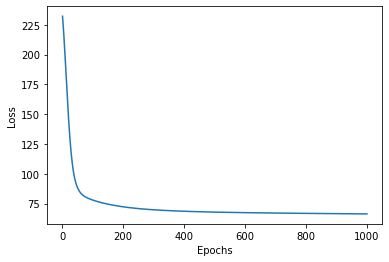

In [46]:
my_reg.plot()

In [47]:
pred = my_reg.predict(train_X, getIntVal=True)
acc = (pred == train_Y).sum()

In [48]:
pred = my_reg.predict(test_X, getIntVal=True)

In [49]:
output = pd.DataFrame({'PassengerId': test["PassengerId"], 'Survived': pred})

In [50]:
output

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [51]:
acc = (my_reg.predict(train_X, getIntVal=True) == train_Y).sum() / train_X.shape[0]

In [52]:
print(f"Acc : {acc*100}")

Acc : 78.67564534231201


In [53]:
output.to_csv('HW_01_LogisticRegression_Model01.csv', index=False)

&emsp; **T7.** Submit a screenshot of your submission (with the scores). Upload
your code to courseville.

From Logistic Regression model using 4 features ($Pclass, Sex, Age,$ and $Embarked$), clear outlier, and normalize data. <br>
$h_\theta(x)  = \frac{1}{1+e^{-\theta^{T}x}}$ where $\theta^Tx = \theta_0 + \theta_1x_1 + \theta_2x_2 + \theta_3x_3 + \theta_4x_4$ <br><br>
$x_1 : Pclass$ of data <br>
$x_2 : Sex$ of data <br>
$x_3 : Age$ of data <br>
$x_4 : Embarked$ of data <br>
$\theta_i :$ Parameter in model for each feature <br><br>
From $h_\theta(x)$, we have Loss function (MSE) is $J(\theta) = \frac{1}{m}\sum_{i=1}^{m}(y_i-h_\theta(x))^2$ <br>
then, we change the Loss function to $\frac{m}{2}J(\theta) = \frac{1}{2}\sum_{i=1}^{m}(y_i-h_\theta(x))^2$ <br>
so, $\frac{\partial J}{\partial\theta_j} = -\sum_{i=1}^{m}(y_i-h_\theta(x))x_{i}^{(j)}$ <br>
hence, we can update parameter $\theta_j$ by $\theta_j \leftarrow \theta_j + r\sum_{i=1}^{m}(y_i-h_\theta(x))x_{i}^{(j)} $ 

From this model, we get score **0.76555**.

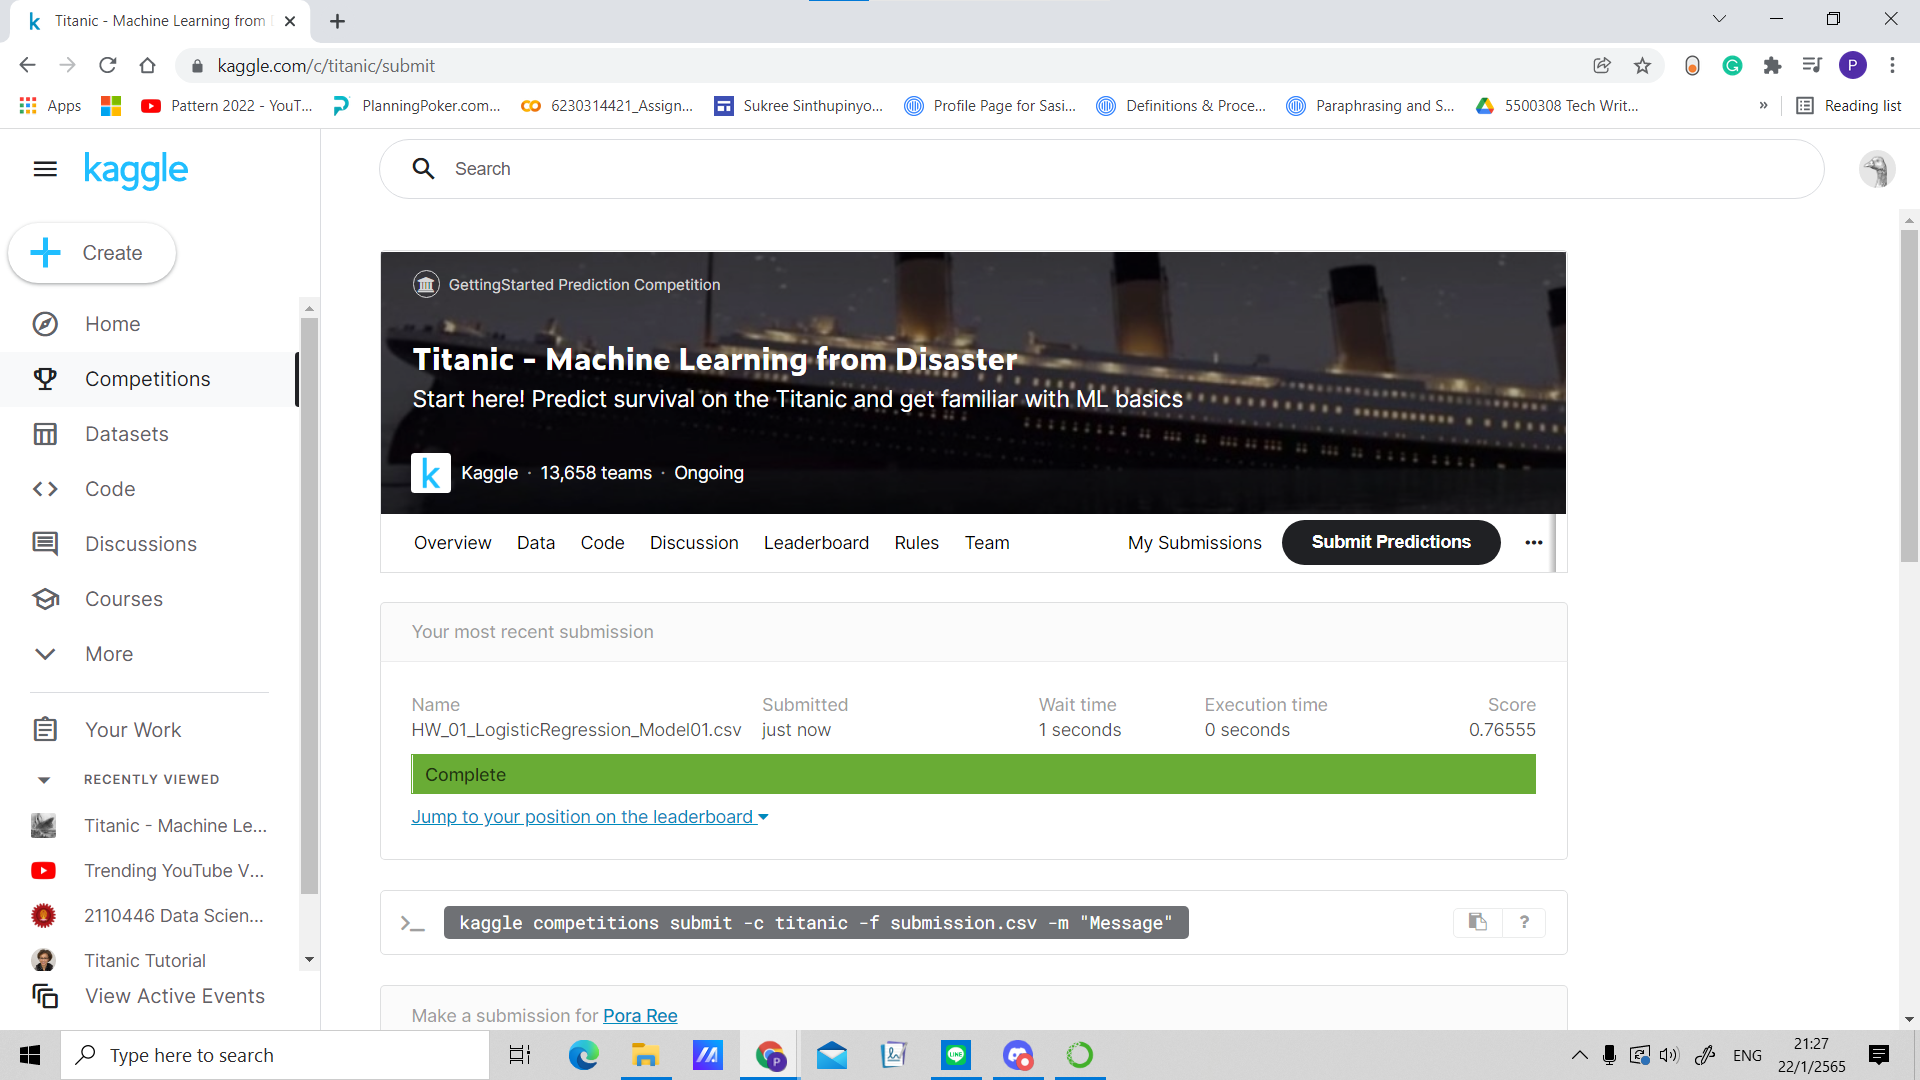

&emsp; **T8.** Try adding some higher order features to your training ($x^2_1, x_1x_2,...$).
Does this model has better **accuracy on the training set**? How does it
perform on the **test set**?

We try to add feature $Age_{Normalized}^2$ in the model. <br>
From Logistic Regression model using 4 features ($Pclass, Sex, Age, Embarked$ and $Age^2$), clear outlier, and normalize data. <br>
$h_\theta(x)  = \frac{1}{1+e^{-\theta^{T}x}}$ where $\theta^Tx = \theta_0 + \theta_1x_1 + \theta_2x_2 + \theta_3x_3 + \theta_4x_4 + \theta_5x_3^2$ <br><br>
$x_1 : Pclass$ of data <br>
$x_2 : Sex$ of data <br>
$x_3 : Age$ of data <br>
$x_4 : Embarked$ of data <br>
$\theta_i :$ Parameter in model for each feature <br><br>

In [54]:
train["Age_Degree-2"] = train["Age"]**2
test["Age_Degree-2"] = test["Age"]**2
train["Age_Degree-2_norm"] = train["Age_Degree-2"] /train["Age_Degree-2"].max()
test["Age_Degree-2_norm"] = test["Age_Degree-2"] /test["Age_Degree-2"].max()
train["Age_Sex_norm"] = train["Age_norm"]*train["Sex"]
test["Age_Sex_norm"] = test["Age_norm"]*test["Sex"]

In [55]:
train

,PassengerId,Survived,Pclass,Sex,Age,Embarked,Pclass_norm,Age_norm,Embarked_norm,Age_Degree-2,Age_Degree-2_norm,Age_Sex_norm
0,1,0,3,0,22.0,0,1.000000,0.339441,0.0,484.0,0.115220,0.0
1,2,1,1,1,38.0,1,0.333333,0.586307,0.5,1444.0,0.343755,0.586307
2,3,1,3,1,26.0,0,1.000000,0.401157,0.0,676.0,0.160927,0.401157
3,4,1,1,1,35.0,0,0.333333,0.540019,0.0,1225.0,0.291621,0.540019
4,5,0,3,0,35.0,0,1.000000,0.540019,0.0,1225.0,0.291621,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0.666667,0.416586,0.0,729.0,0.173544,0.0
887,888,1,1,1,19.0,0,0.333333,0.293153,0.0,361.0,0.085939,0.293153
888,889,0,3,1,28.0,0,1.000000,0.432015,0.0,784.0,0.186637,0.432015
889,890,1,1,0,26.0,1,0.333333,0.401157,0.5,676.0,0.160927,0.0


In [56]:
train_X = np.array(train[["Pclass","Sex","Age_norm","Age_Degree-2_norm", "Embarked_norm", "Age_Sex_norm"]].values, dtype = float)
train_Y = train["Survived"].values
test_X  = np.array(test[["Pclass","Sex","Age_norm","Age_Degree-2_norm", "Embarked_norm", "Age_Sex_norm"]].values, dtype = float)

In [57]:
my_reg = Logistic_Regression()

In [58]:
my_reg.fit(train_X, train_Y, learning_rate = 1e-4, show_history = False, epochs=1000)

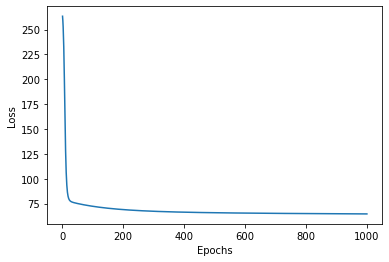

In [59]:
my_reg.plot()

In [60]:
pred = my_reg.predict(test_X, getIntVal=True)

In [61]:
output = pd.DataFrame({'PassengerId': test["PassengerId"], 'Survived': pred})

In [62]:
output

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [63]:
acc = (my_reg.predict(train_X, getIntVal=True) == train_Y).sum() / train_X.shape[0]

In [64]:
print(f"Acc : {acc*100}")

Acc : 78.67564534231201


In [65]:
output.to_csv('HW_01_LogisticRegression_Model02.csv', index=False)

From this model, we get score **0.76794**, that is more than **T6.**. Because, this model adds feature $(Age^2)_{Norm}, Age_{Norm}*Sex$, so it find more relation between $(Age^2)_{Norm}$ and $Age_{Norm}*Sex$. From adding more feature, the test set have to be modified too (add $(Age^2)_{Norm}$ and $Age_{Norm}*Sex$).

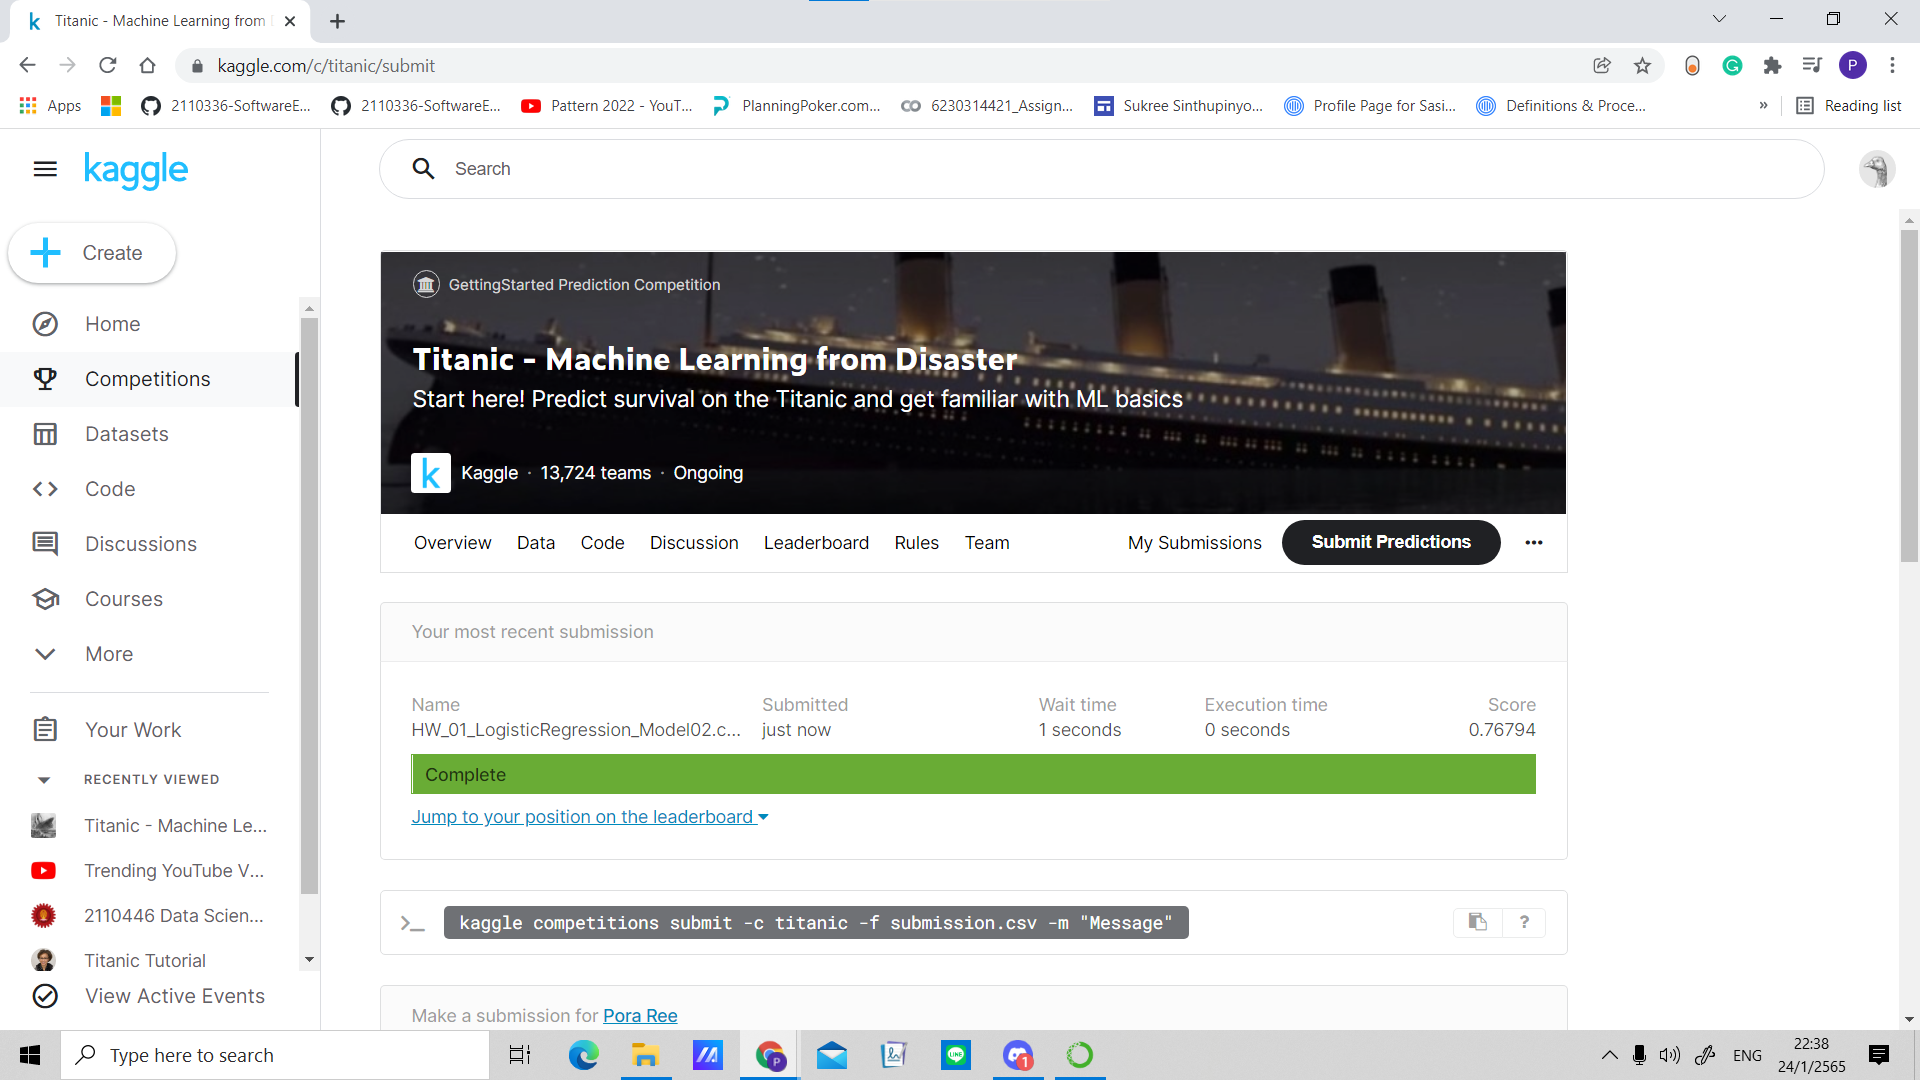

&emsp; **T9.** What happens if you reduce the amount of features to just Sex and
Age?

From Logistic Regression model using 2 features ("Sex", and "Age"), clear outlier, and normalize data. <br>
$h_\theta(x)  = \frac{1}{1+e^{-\theta^{T}x}}$ where $\theta^Tx = \theta_0 + \theta_1x_1 + \theta_2x_2 $ <br><br>
$x_1 : Sex$ of data <br>
$x_2 : Age$ of data <br>
$\theta_i :$ Parameter in model for each feature <br><br>

In [66]:
train

,PassengerId,Survived,Pclass,Sex,Age,Embarked,Pclass_norm,Age_norm,Embarked_norm,Age_Degree-2,Age_Degree-2_norm,Age_Sex_norm
0,1,0,3,0,22.0,0,1.000000,0.339441,0.0,484.0,0.115220,0.0
1,2,1,1,1,38.0,1,0.333333,0.586307,0.5,1444.0,0.343755,0.586307
2,3,1,3,1,26.0,0,1.000000,0.401157,0.0,676.0,0.160927,0.401157
3,4,1,1,1,35.0,0,0.333333,0.540019,0.0,1225.0,0.291621,0.540019
4,5,0,3,0,35.0,0,1.000000,0.540019,0.0,1225.0,0.291621,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0.666667,0.416586,0.0,729.0,0.173544,0.0
887,888,1,1,1,19.0,0,0.333333,0.293153,0.0,361.0,0.085939,0.293153
888,889,0,3,1,28.0,0,1.000000,0.432015,0.0,784.0,0.186637,0.432015
889,890,1,1,0,26.0,1,0.333333,0.401157,0.5,676.0,0.160927,0.0


In [67]:
train_X = np.array(train[["Sex","Age_norm"]].values, dtype = float)
train_Y = train["Survived"].values
test_X  = np.array(test[["Sex","Age_norm"]].values, dtype = float)

In [68]:
my_reg = Logistic_Regression()

In [69]:
my_reg.fit(train_X, train_Y, learning_rate = 1e-4, show_history = False, epochs=1000)

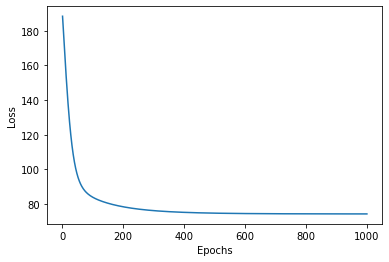

In [70]:
my_reg.plot()

In [71]:
pred = my_reg.predict(test_X, getIntVal=True)

In [72]:
output = pd.DataFrame({'PassengerId': test["PassengerId"], 'Survived': pred})

In [73]:
output

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [74]:
acc = (my_reg.predict(train_X, getIntVal=True) == train_Y).sum() / train_X.shape[0]

In [75]:
print(f"Acc : {acc*100}")

Acc : 78.67564534231201


In [76]:
output.to_csv('HW_01_LogisticRegression_Model03.csv', index=False)

From this model, we get score **0.76555**, same as models in **T6.**.

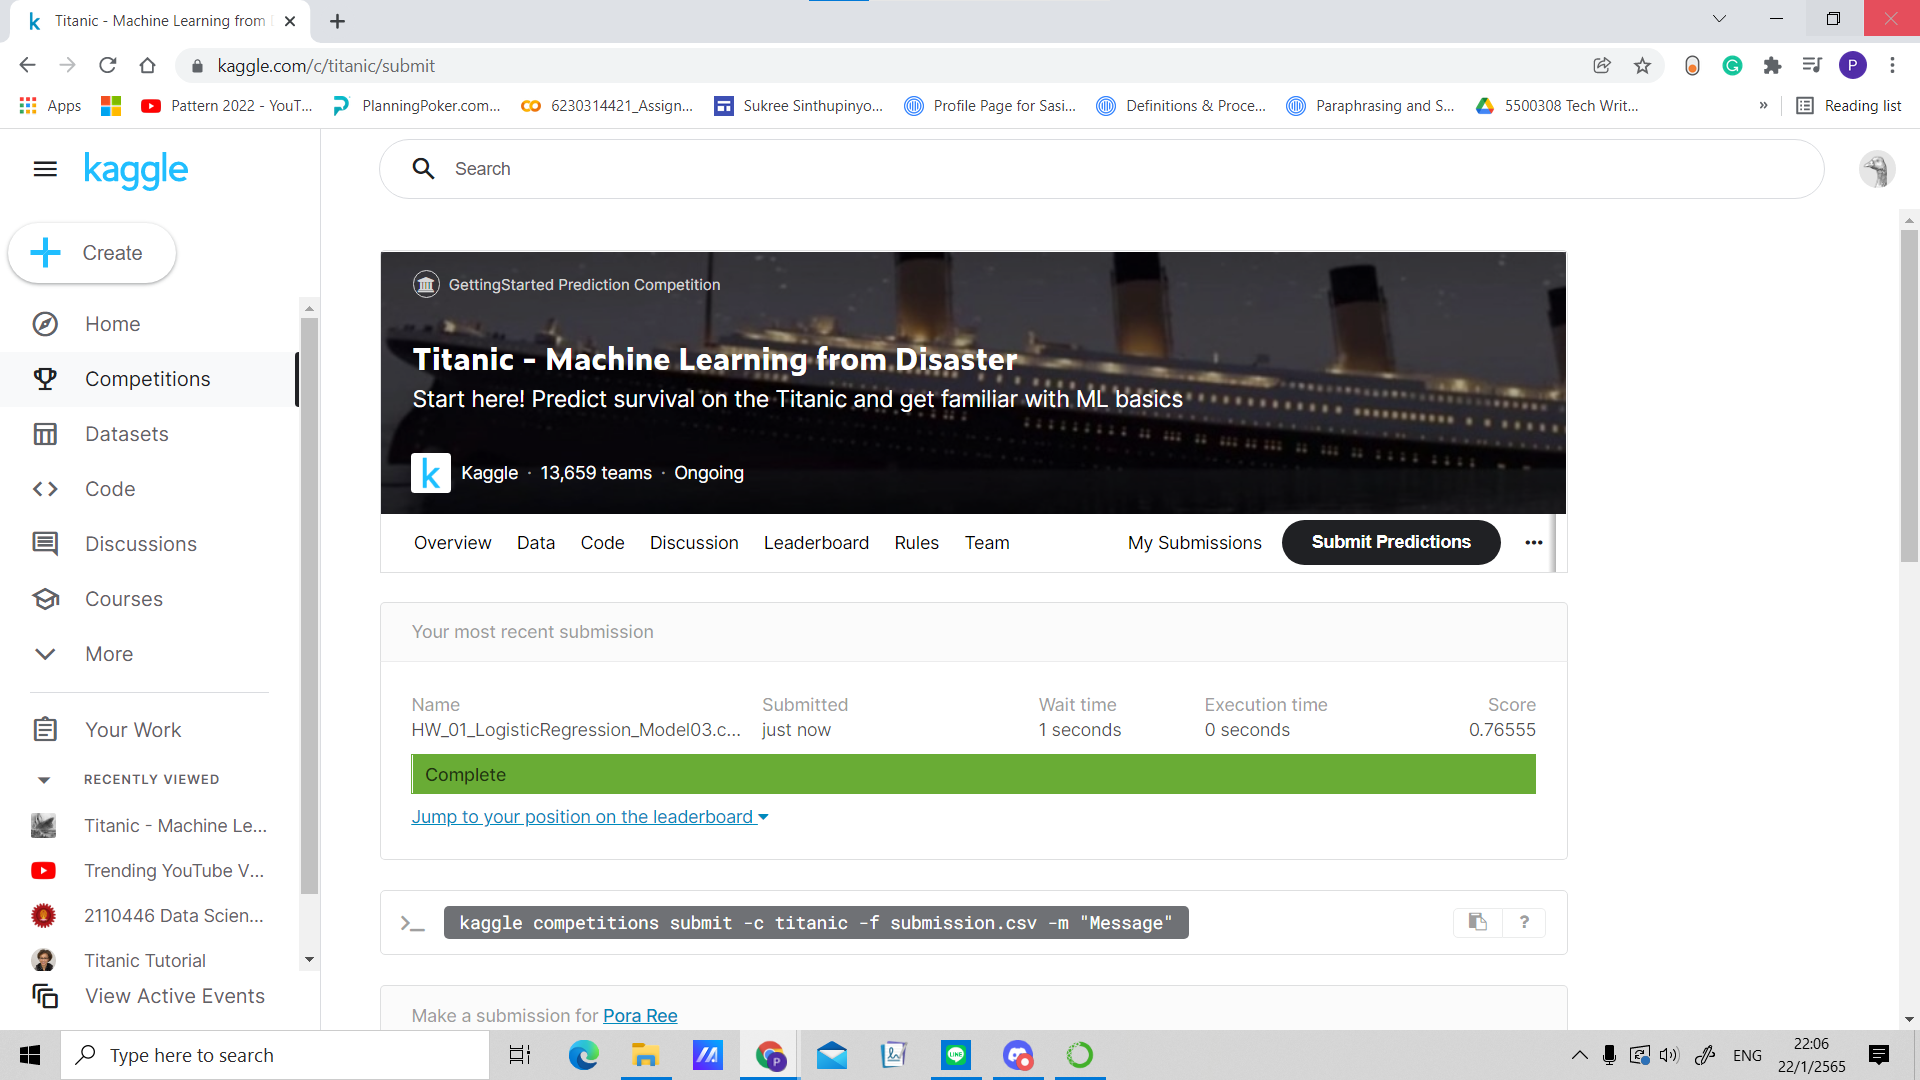

&emsp; **OT2.** We want to show that matrix inversion yields the same answer
as the gradient descent method. However, there is no closed form solution for
logistic regression. Thus, we will use normal linear regression instead. Re-do
the Titanic task as a regression problem by using linear regression. Use the
gradient descent method.

We use the same code from class Logistic Regression, but change method h(x) (from $logistic(Theta*x)$ to $Theta*x$)

In [95]:
class Linear_Regression:
    def __init__(self):
        self.coef = None
        self.learning_rate = None
        self.epoch = None
        self.history = None
        
    def add_x0(self, x):
        new_x = np.ones((x.shape[0], x.shape[1]+1))
        new_x[:,1:] = x
        return new_x
    
    def initialize(self, x_shape, y_shape, learning_rate):
        print()
        self.coef = np.ones(x_shape[1]).reshape(x_shape[1])
        self.learning_rate = learning_rate
        self.history = []
    
    def h_x(self, data):
        # coef = [t0, t1, t2, t3, ... , tn]
        # data = [ 1, d1, d2, d3, ... , dn]
        # want h(x) = 1/( 1 + e^(-coef * data)  )
        return np.dot(self.coef, data)
    
    def predict(self, data_X, add_x0 = True, getIntVal = False):
        if add_x0:
            data_X = self.add_x0(np.array(data_X))
        preds = []
        for data in data_X:
            preds.append(self.h_x(data))
        preds = np.array(preds)
        if getIntVal:
            preds = preds > 0.5
            preds = preds.astype(int)
        return preds
    
    def train(self, x, y, learning_rate):
        # predict y' using x and current coefs
        # for each coef, calculate curl loss by curl coef
        #   calculate (vec(y) - vec(h)) multiple with x_coef
        preds = self.predict(x, add_x0 = False)
        error = y - preds
        next_coefs = self.coef.copy()
        for idx, coef in enumerate(self.coef):
            grad = np.sum(error * x[:, idx])
            next_coefs[idx] += grad*learning_rate
        self.coef = next_coefs
        
    def getLoss(self, x, y):
        preds = self.predict(x, add_x0 = False)
        loss = 0.5 * np.sum((y - preds)**2)
        return loss
        
    def fit(self, x, y, learning_rate = 0.01, epochs = 1000, show_history = True):
        #prepare data x, y
        x = self.add_x0(np.array(x))
        y = np.array(y)
        
        #reset history
        self.history = []
        
        #initialize coef matrix|
        self.initialize(x.shape, y.shape, learning_rate)
        
        for epoch in range(1, epochs+1):
            self.train(x, y, learning_rate)
            self.history.append(self.getLoss(x, y))
            if  show_history:
                print(f"Epoch {epoch:2d}: Loss = {self.history[-1]}")
    def plot(self):
        plt_x = range(1, len(self.history)+1)
        plt_y = self.history
        plt.xlabel('Epochs') 
        plt.ylabel('Loss') 
        plt.plot(plt_x, plt_y)

In [96]:
train_X = np.array(train[["Sex","Age_norm"]].values, dtype = float)
train_Y = train["Survived"].values
test_X  = np.array(test[["Sex","Age_norm"]].values, dtype = float)

In [97]:
my_reg = Linear_Regression()

In [107]:
my_reg.fit(train_X, train_Y, learning_rate = 1e-4, show_history = False, epochs=1000)

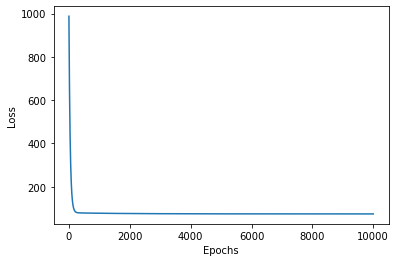

In [108]:
my_reg.plot()

In [109]:
pred = my_reg.predict(test_X, getIntVal=True)

In [110]:
output = pd.DataFrame({'PassengerId': test["PassengerId"], 'Survived': pred})

In [111]:
output

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [112]:
acc = (my_reg.predict(train_X, getIntVal=True) == train_Y).sum() / train_X.shape[0]

In [114]:
print(f"Acc : {acc*100}")

Acc : 78.67564534231201


In [115]:
output.to_csv('HW_01_LinearRegression_Model01.csv', index=False)

From this model, we get score **0.76555**, same as Logistic Regression model.

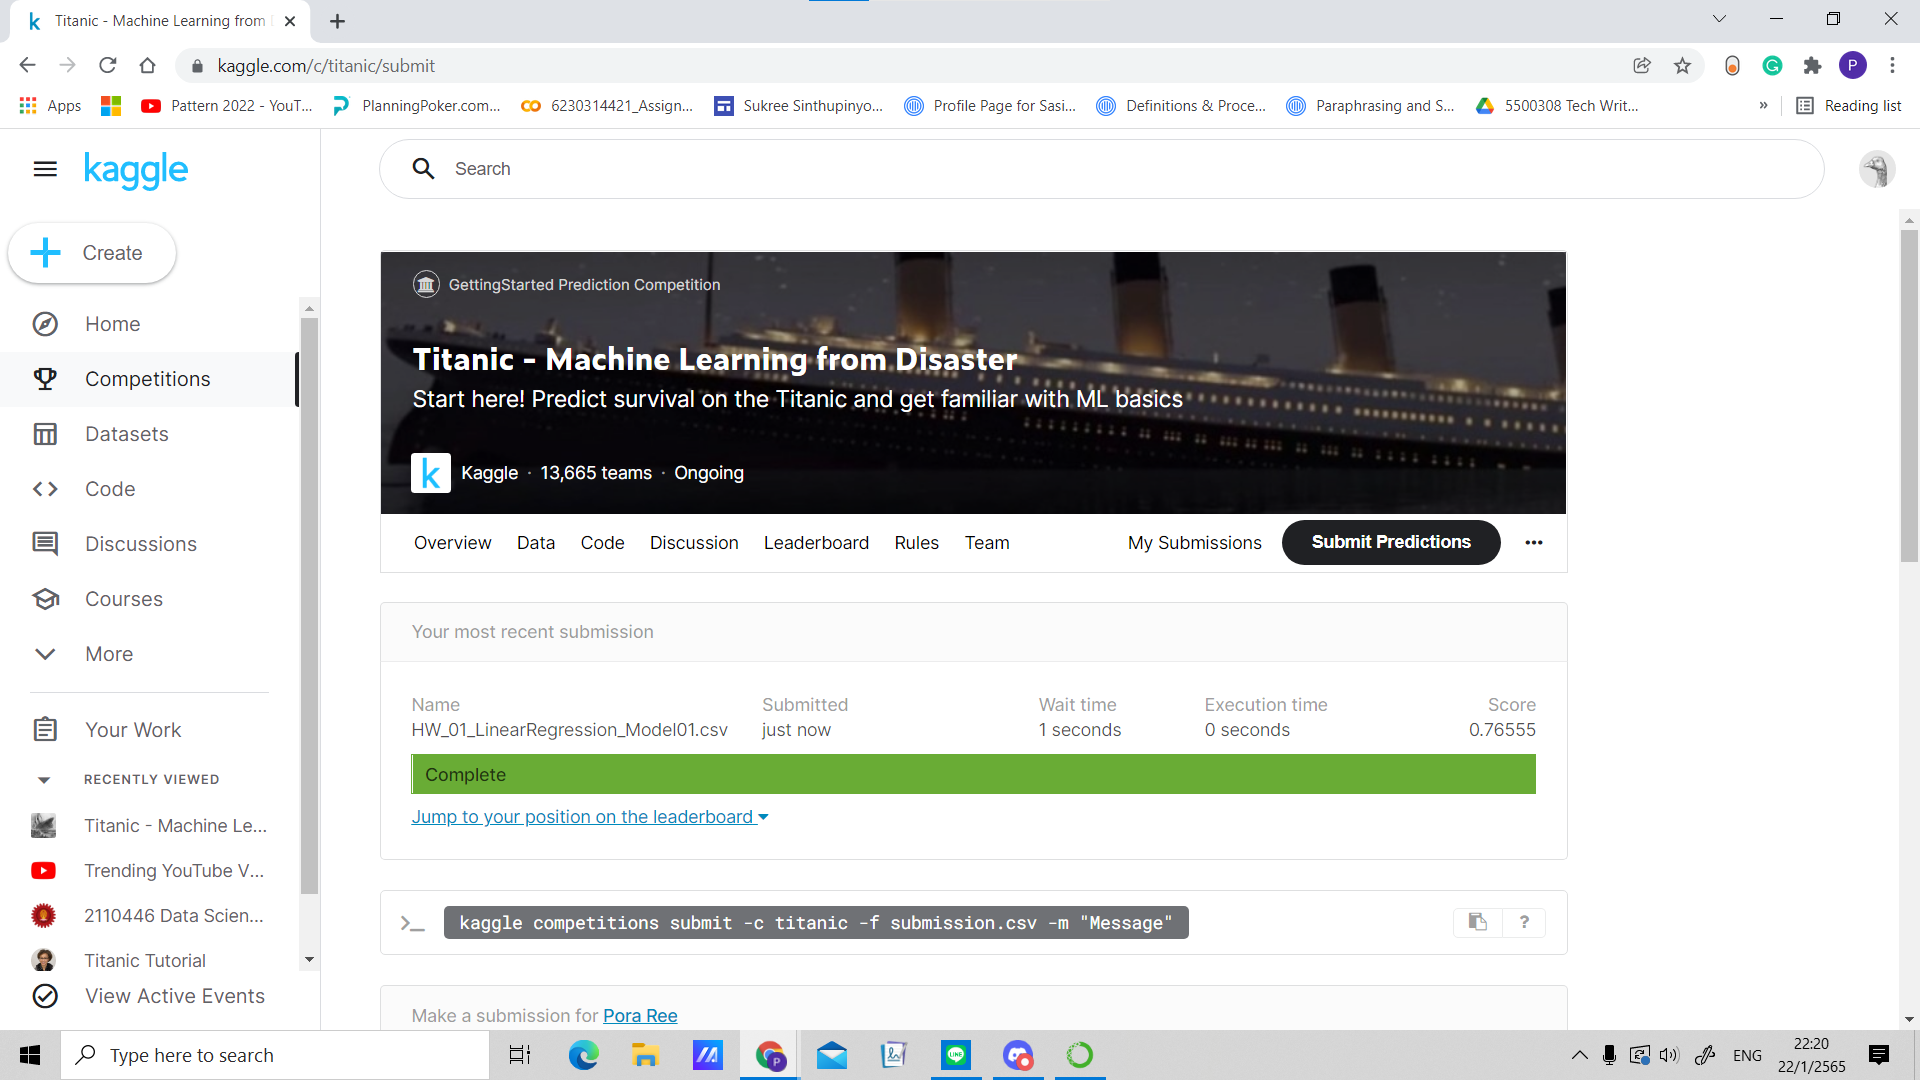

&emsp; **OT3.** Now try using matrix inversion instead. However Are the weights learned from the two methods similar? Report the Mean Squared Errors (MSE) of the difference between the two weights.


We try to use matrix inversion compared with learning method in linear regression model <br>
$given$ <br>
$X$ is "train_X", which is feature matrix shape = (891, 3) ; have 1 constant feature <br>
$y$ is "train_Y", which is target vector shape = (891,)

In [88]:
print(train_X.shape, train_Y.shape)

(891, 2) (891,)


In [89]:
X = np.ones((891,3))
X[:,1:] = train_X
y = train_Y

In [90]:
print(X.shape, y.shape)

(891, 3) (891,)


We can find $\theta$ (parameters) by this equation below <br>
$$ \theta = (X^TX)^{-1}X^Ty$$

In [91]:
theta = np.matmul( np.matmul( np.linalg.inv(  np.matmul(X.transpose(1,0), X) ) , X.transpose(1,0) ), y)

In [92]:
theta

array([ 0.21412861,  0.55135377, -0.05440308])

In [93]:
my_reg.coef

array([ 0.19777177,  0.5535448 , -0.02107435])

Both $\theta$ (from model and matrix inversion) are close to the same.

for Mean Square Error (MSE)

In [94]:
# find MSE of model (my_reg.coef)
#for model, MSE = Loss * 2
MSE_model = my_reg.getLoss(X, y)*2

# find MSE of matrix inv
preds = []
for data in X:
    preds.append(np.dot(theta, data))
preds = np.array(preds)
error = preds - y
SE = error**2
MSE_MI = np.sum(SE)

# show MSE
print(f"from linear regression model, MSE = {MSE_model}")
print(f"from matrix inversion, MSE        = {MSE_MI}")

from linear regression model, MSE = 148.4505068871198
from matrix inversion, MSE        = 148.41151801569026


Both MSE (from model and matrix inversion) are close to the same.

## [Optional] Fun with matrix algebra
Prove the following statements. All of them can be solved by first expanding
out the matrix notation as a combination of their elements, and then use the
definitions of trace and matrix derivatives to help finish the proof. For example,
the $(i, j)$ element of $Y = AB$ is $Y_{i,j} = \sum_{m}A_{i,m}B_{m,j}$. <br>
&emsp; **OT4.** $\nabla_{A}trAB = B^{T}$ <br>
&emsp; **OT5.** $\nabla_{A^{T}} f(A) = (\nabla_{A}f(A))^{T}$ <br>
&emsp; **OT6.** $\nabla_{A}trABA^{T}C = CAB + C^{T}AB^{T}$ <br>
Hint: Try first solving the easier equation of $\nabla_{A}trBAC = (CB)^{T} =B^{T}C^{T}$

&emsp; given
$A = 
\begin{bmatrix}
 A_{11} & \cdots & A_{1n} \\ 
 \vdots & \ddots & \vdots \\ 
 A_{m1} & \cdots & A_{mn}
\end{bmatrix} \;; \;\;\;
\nabla_{A} f = 
\begin{bmatrix}
 \frac{\partial f}{\partial A_{11}} & \cdots & \frac{\partial f}{\partial A_{1n}} \\ 
 \vdots & \ddots & \vdots \\ 
 \frac{\partial f}{\partial A_{m1}} & \cdots & \frac{\partial f}{\partial A_{mn}}
\end{bmatrix}$$ \;; \;\;\;
tr A = \sum_{i=1}^{N} A_{ii} $



&emsp; **OT4.** $\nabla_{A}trAB = B^{T}$  <br>
&emsp;
Let A = $
\begin{bmatrix}
 \longleftarrow \vec{a_1} \longrightarrow  \\
 \longleftarrow \vec{a_2} \longrightarrow  \\
 \vdots  \\
 \longleftarrow \vec{a_n} \longrightarrow  \\
\end{bmatrix} \;; \;\;\; $
B = $\begin{bmatrix}
 \uparrow & \uparrow & & \uparrow  \\
 \vec{b_1} & \vec{b_2} & \cdots & \vec{b_n} \\
 \downarrow & \downarrow & & \downarrow
\end{bmatrix}$

\begin{equation}
\begin{split}
  tr(AB) & = tr \left( \begin{bmatrix}
                 \longleftarrow \vec{a_1} \longrightarrow  \\
                 \longleftarrow \vec{a_2} \longrightarrow  \\
                 \vdots  \\
                 \longleftarrow \vec{a_n} \longrightarrow  \\
                \end{bmatrix}
                \begin{bmatrix}
                 \uparrow & \uparrow & & \uparrow  \\
                 \vec{b_1} & \vec{b_2} & \cdots & \vec{b_n} \\
                 \downarrow & \downarrow & & \downarrow
                \end{bmatrix} \right) \\
  & = tr \begin{bmatrix}
          \vec{a_1}^{T}\vec{b_1}^{T} & \vec{a_1}^{T}\vec{b_2}^{T} & \cdots & \vec{a_1}^{T}\vec{b_n}^{T} \\
          \vec{a_2}^{T}\vec{b_1}^{T} & \vec{a_2}^{T}\vec{b_2}^{T} & \cdots & \vec{a_2}^{T}\vec{b_n}^{T} \\
          \vdots & & \ddots & \vdots \\
          \vec{a_n}^{T}\vec{b_1}^{T} & \vec{a_n}^{T}\vec{b_2}^{T} & \cdots & \vec{a_n}^{T}\vec{b_n}^{T} \\
         \end{bmatrix} \\
  & = \sum_{i=1}^{m}a_{1,i}b_{i,1} + \sum_{i=1}^{m}a_{2,i}b_{i,2} + \cdots +  \sum_{i=1}^{m}a_{n,i}b_{i,n} \\
  \because \frac{\partial tr(AB)}{\partial A_{ij}} & =  b_{ji}\\
  \therefore \nabla_{A}tr(AB) & = B^{T}
\end{split}
\end{equation}




&emsp; **OT5.** $\nabla_{A^{T}} f(A) = (\nabla_{A}f(A))^{T}$ \
\begin{equation}
\begin{split}
  \nabla_{A^{T}} f(A) & = \begin{bmatrix}
                         \frac{\partial f(A)}{\partial A_{11}} & \frac{\partial f(A)}{\partial A_{21}} & \cdots & \frac{\partial f(A)}{\partial A_{n1}} \\
                         \frac{\partial f(A)}{\partial A_{12}} & \frac{\partial f(A)}{\partial A_{22}} & \cdots & \frac{\partial f(A)}{\partial A_{n2}} \\
                         \vdots & \vdots & \ddots & \vdots \\
                         \frac{\partial f(A)}{\partial A_{1m}} & \frac{\partial f(A)}{\partial A_{2m}} & \cdots & \frac{\partial f(A)}{\partial A_{nm}} \\
                        \end{bmatrix}\\
  & = \begin{bmatrix}
       \frac{\partial f(A)}{\partial A_{11}} & \frac{\partial f(A)}{\partial A_{12}} & \cdots & \frac{\partial f(A)}{\partial A_{1n}} \\
       \frac{\partial f(A)}{\partial A_{21}} & \frac{\partial f(A)}{\partial A_{22}} & \cdots & \frac{\partial f(A)}{\partial A_{2n}} \\
       \vdots & \vdots & \ddots & \vdots \\
       \frac{\partial f(A)}{\partial A_{m1}} & \frac{\partial f(A)}{\partial A_{m2}} & \cdots & \frac{\partial f(A)}{\partial A_{mn}} \\
                        \end{bmatrix}^{T}\\
  & = (\nabla_{A}f(A))^{T}
\end{split}
\end{equation}



&emsp; **OT6.** $\nabla_{A}trABA^{T}C = CAB + C^{T}AB^{T}$ \
&emsp;&emsp;&emsp; let $AB = f(A)$
\begin{equation}
\begin{split}
  \nabla_{A}trABA^{T}C & = \nabla_{A}trf(A)A^{T}C \\
  & = \nabla_{\bullet}trf(\bullet)A^{T}C + \nabla_{\bullet}trf(A)\bullet^{T}C \\
  & = (A^{T}C)^{T}f'(\bullet) + (\nabla_{\bullet^{T}}trf(A)\bullet^{T}C)^{T} \\
  & = C^{T}AB^{T} + (\nabla_{\bullet^{T}}tr\bullet^{T}Cf(A))^{T} \\
  & = C^{T}AB^{T} + ((Cf(A))^{T})^{T} \\
  & = C^{T}AB^{T} + CAB \\
  & = CAB + C^{T}AB^{T}
\end{split}
\end{equation}

